In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



# Generating Random Networks

## 1.  Create random networks using Erdös-Rényi (ER) model

### a, b

Probability : 0.003 
Mean : 3.144 
Variance : 3.180444 
Is connected? : FALSE 
gcc size : 937 
Probability : 0.004 
Mean : 4.116 
Variance : 4.174719 
Is connected? : FALSE 
gcc size : 983 
Probability : 0.01 
Mean : 9.854 
Variance : 9.480164 
Is connected? : TRUE 
gcc size : 1000 
Probability : 0.05 
Mean : 50.34 
Variance : 49.7001 
Is connected? : TRUE 
gcc size : 1000 
Probability : 0.1 
Mean : 99.236 
Variance : 96.90521 
Is connected? : TRUE 
gcc size : 1000 


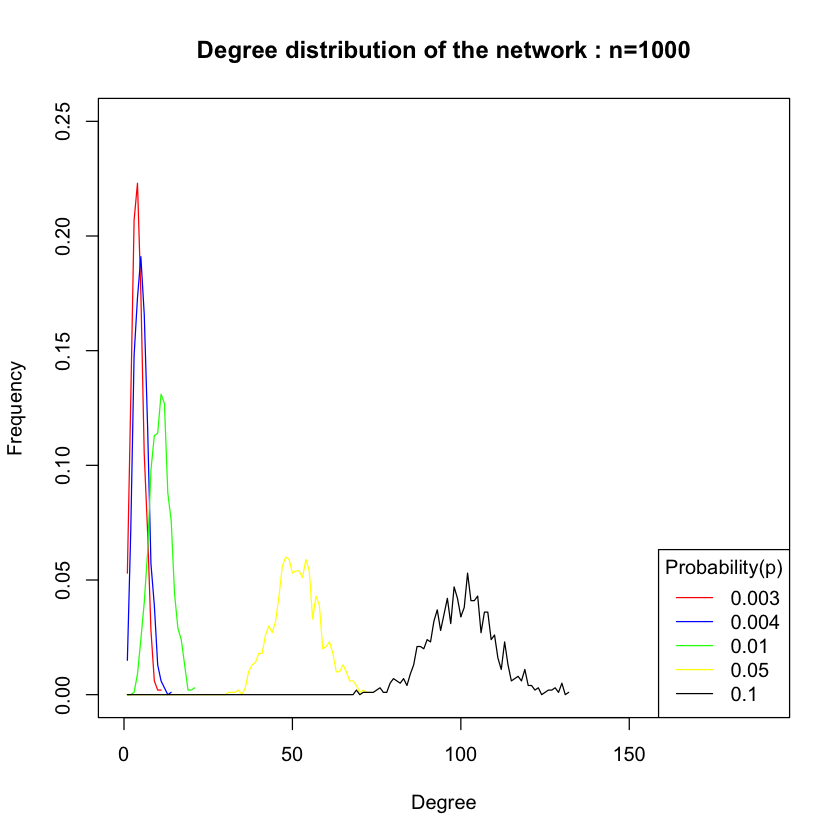

In [5]:
set.seed(12345)
pl = c(0.003,0.004,0.01,0.05,0.1)
cols =c('red','blue','green','yellow','black')
gl_map = c()
tmp =0
for( p in pl){
    cat("Probability :",p,"\n")
    g = erdos.renyi.game(1000, p, directed=F)
    degreesVector <- degree(g)
    #hist(degreesVector)
    cat("Mean :",mean(degreesVector),"\n")
    cat("Variance :",var(degreesVector),"\n")
    cat("Is connected? :", is.connected(g),"\n")
    g.components <- clusters(g)
    #print(g.components$csize)
    # which is the largest component
    ix <- which.max(g.components$csize)
    tmp = tmp+1
    if(tmp==1)
        plot(col=cols[tmp],xlim=c(0,190),ylim =c(0,0.25),degree.distribution(g),main=paste("Degree distribution of the network : n=1000"),xlab="Degree",ylab="Frequency",type='l')
    else{
        lines(col=cols[tmp],degree.distribution(g),main=paste("Degree distribution of the network"),xlab="Degree",ylab="Frequency",type='l')
    }
    # get the subgraph correspondent to just the giant component
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    cat("gcc size :",vcount(g.giant),"\n")
}
legend("bottomright", legend=pl,col=cols,title="Probability(p)", lwd=1)


### C

In [41]:
pl2 = c(0.001, 0.003, 0.004,0.01,0.03,0.05,0.1)

In [42]:
x = c()
for(p in pl2){
    x = c(x, rep(p,100))
}

In [43]:
cl = c()
set.seed(12345)
for( p in pl2){
    connected_c = 0
    size_un_con = 0
    size_un_con_cnt = 0
    print(p)
    for(i in 1:100){
        g = erdos.renyi.game(1000, p, directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
       # print(vcount(g.giant)/1000)
        if(is.connected(g)){
            connected_c = connected_c+1
        }
        else{
            #print("found")
            size_un_con_cnt = size_un_con_cnt +1
           size_un_con=size_un_con+ diameter(g.giant)
        }
        cl = c(cl,vcount(g.giant)/1000)
        
    }
    print(size_un_con/size_un_con_cnt)
    cat(p," ", connected_c/100,"\n")
    
}


[1] 0.001
[1] 25.03
0.001   0 
[1] 0.003
[1] 14.07
0.003   0 
[1] 0.004
[1] 10.85
0.004   0 
[1] 0.01
[1] 5
0.01   0.98 
[1] 0.03
[1] NaN
0.03   1 
[1] 0.05
[1] NaN
0.05   1 
[1] 0.1
[1] NaN
0.1   1 


In [44]:
library('RColorBrewer')
colbox<-brewer.pal(n=10,name="Set3")
cols_ = c()


In [45]:
for(x_ in x){
    cols_ = c(cols_,colbox[match(x,pl2)])
}

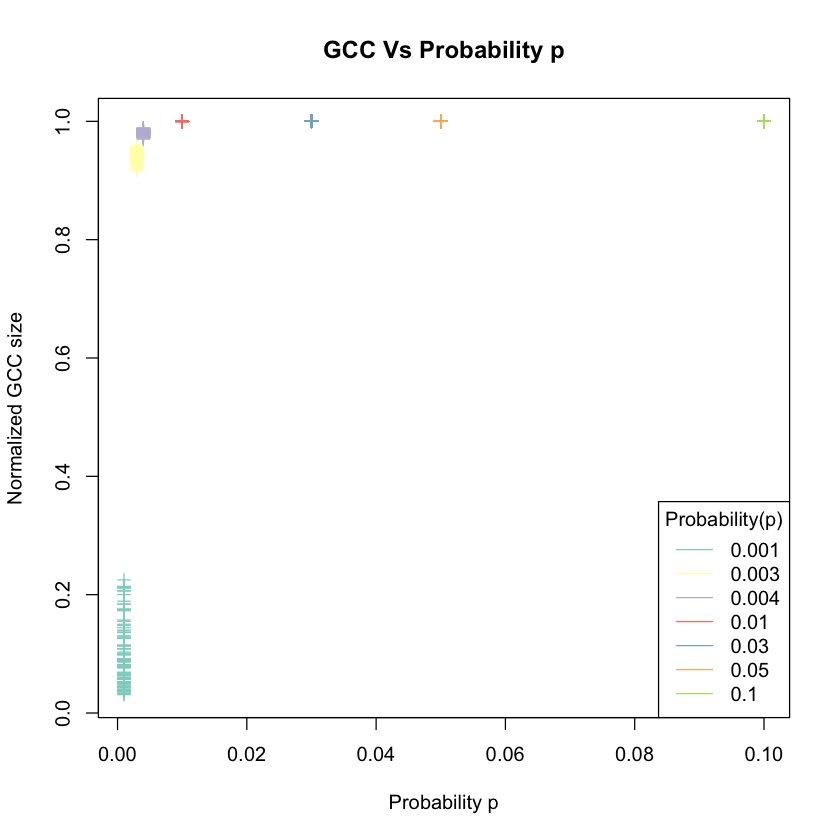

In [46]:
plot(x, cl, pch = 3,main="GCC Vs Probability p", col = cols_,ylab="Normalized GCC size", xlab="Probability p")
legend("bottomright", legend=pl2,col=colbox, lwd=1,title="Probability(p)")


In [29]:
pl2 = seq(0.001, 0.01, length.out = 200)

In [30]:
print(pl2)

  [1] 0.001000000 0.001045226 0.001090452 0.001135678 0.001180905 0.001226131
  [7] 0.001271357 0.001316583 0.001361809 0.001407035 0.001452261 0.001497487
 [13] 0.001542714 0.001587940 0.001633166 0.001678392 0.001723618 0.001768844
 [19] 0.001814070 0.001859296 0.001904523 0.001949749 0.001994975 0.002040201
 [25] 0.002085427 0.002130653 0.002175879 0.002221106 0.002266332 0.002311558
 [31] 0.002356784 0.002402010 0.002447236 0.002492462 0.002537688 0.002582915
 [37] 0.002628141 0.002673367 0.002718593 0.002763819 0.002809045 0.002854271
 [43] 0.002899497 0.002944724 0.002989950 0.003035176 0.003080402 0.003125628
 [49] 0.003170854 0.003216080 0.003261307 0.003306533 0.003351759 0.003396985
 [55] 0.003442211 0.003487437 0.003532663 0.003577889 0.003623116 0.003668342
 [61] 0.003713568 0.003758794 0.003804020 0.003849246 0.003894472 0.003939698
 [67] 0.003984925 0.004030151 0.004075377 0.004120603 0.004165829 0.004211055
 [73] 0.004256281 0.004301508 0.004346734 0.004391960 0.00443718

In [31]:
cl = c()
print(1)
set.seed(12345)
print(2)
for( p in pl2){
    #print(p)
    #print(3)
    connected_c = 0
    size_un_con = 0
    size_un_con_cnt = 0
    #print(p)
    for(i in 1:1){
        g = erdos.renyi.game(1000, p, directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
       # print(vcount(g.giant)/1000)
        if(is.connected(g)){
            connected_c = connected_c+1
        }
        else{
            #print("found")
            size_un_con_cnt = size_un_con_cnt +1
           size_un_con=size_un_con+ diameter(g.giant)
        }
        cl = c(cl,vcount(g.giant)/1000)
        
    }
    #print(size_un_con/size_un_con_cnt)
    cat(p," ", connected_c/100,"\n")
    
}


[1] 1
[1] 2
0.001   0 
0.001045226   0 
0.001090452   0 
0.001135678   0 
0.001180905   0 
0.001226131   0 
0.001271357   0 
0.001316583   0 
0.001361809   0 
0.001407035   0 
0.001452261   0 
0.001497487   0 
0.001542714   0 
0.00158794   0 
0.001633166   0 
0.001678392   0 
0.001723618   0 
0.001768844   0 
0.00181407   0 
0.001859296   0 
0.001904523   0 
0.001949749   0 
0.001994975   0 
0.002040201   0 
0.002085427   0 
0.002130653   0 
0.002175879   0 
0.002221106   0 
0.002266332   0 
0.002311558   0 
0.002356784   0 
0.00240201   0 
0.002447236   0 
0.002492462   0 
0.002537688   0 
0.002582915   0 
0.002628141   0 
0.002673367   0 
0.002718593   0 
0.002763819   0 
0.002809045   0 
0.002854271   0 
0.002899497   0 
0.002944724   0 
0.00298995   0 
0.003035176   0 
0.003080402   0 
0.003125628   0 
0.003170854   0 
0.00321608   0 
0.003261307   0 
0.003306533   0 
0.003351759   0 
0.003396985   0 
0.003442211   0 
0.003487437   0 
0.003532663   0 
0.003577889   0 
0.003623116  

In [32]:
x = c()
for(p in pl2){
    x = c(x, rep(p,1))
}

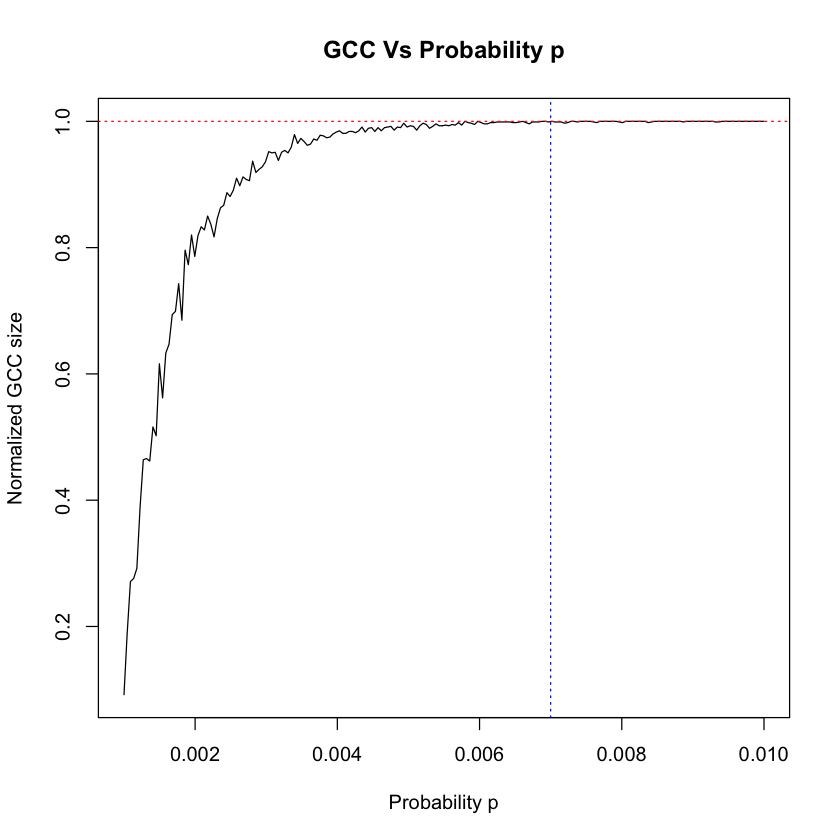

In [39]:
plot(x, cl, pch = 3,main="GCC Vs Probability p",ylab="Normalized GCC size", xlab="Probability p", type='l')
abline(v =0.007, untf = FALSE,lty=3,col='blue')
abline(h=1, untf = FALSE,lty=3,col='red')

### d

In [54]:
do_expected_gcc <- function(deg, plot_ = 'TRUE'){
    set.seed(12345)
    nrange <- 1:100
    iter <- 1:100
    cl =c()
    for(n in nrange){
        temp = c()
        p = deg/(n*100)
        for(i in iter){
        #cat("p ",p," n ",n,"\n")
        g = erdos.renyi.game(n*100, deg/(n*100), directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        #print(vcount(g.giant))
        temp = c(temp,vcount(g.giant))
        }
        cl = c(cl,mean(temp))
       # cat("p ",p," n ",n," m ",mean(temp),"\n")
        
    }
    if(plot_){
        plot(y = cl,x=nrange*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
        if(deg<1){
            lines(y=2*log(nrange*100),x=nrange*100,col='red',lty=2)
        }
        else if(deg ==1){
            lines(y=(nrange*100)^(0.67),x=nrange*100,col='red',lty=2)
        }
            else{
                
            }
        
    }
    else{
        return(cl)
    }
}

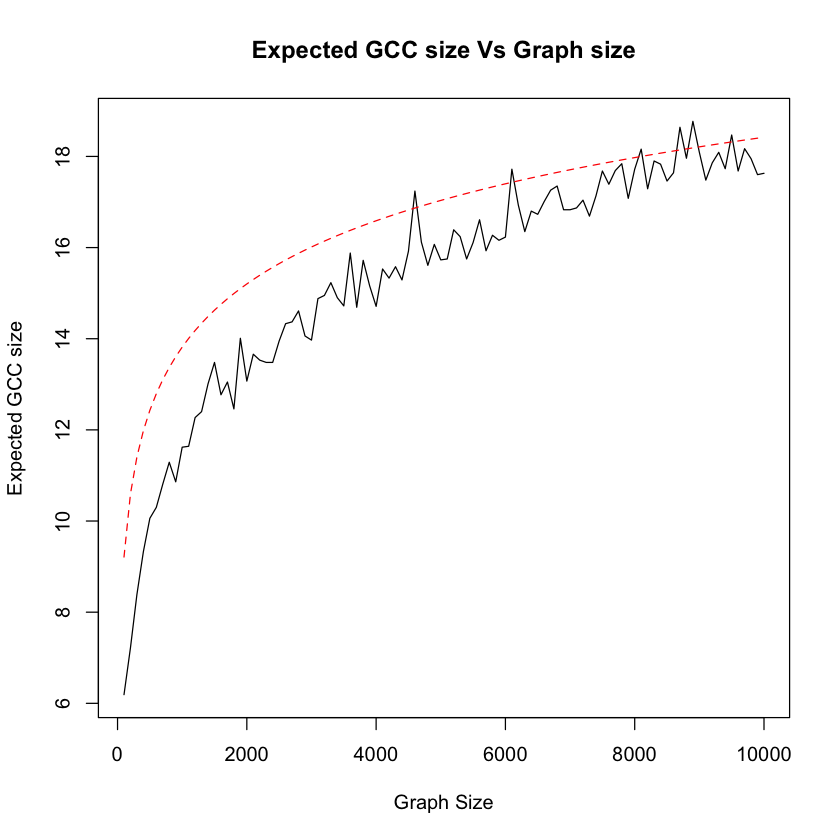

In [56]:
do_expected_gcc(0.5)

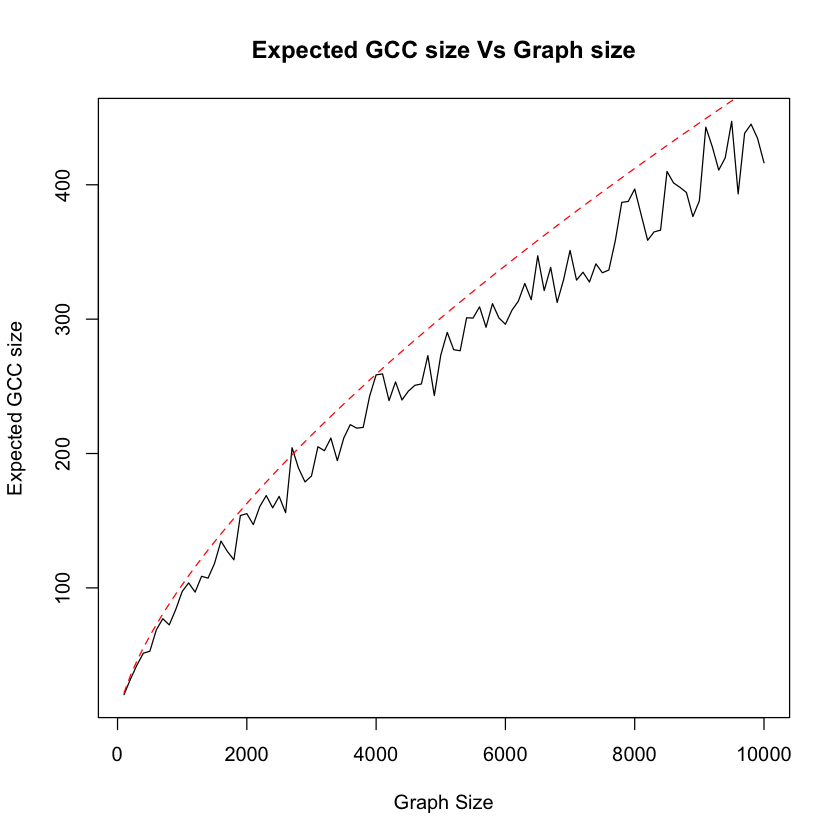

In [55]:
do_expected_gcc(1)

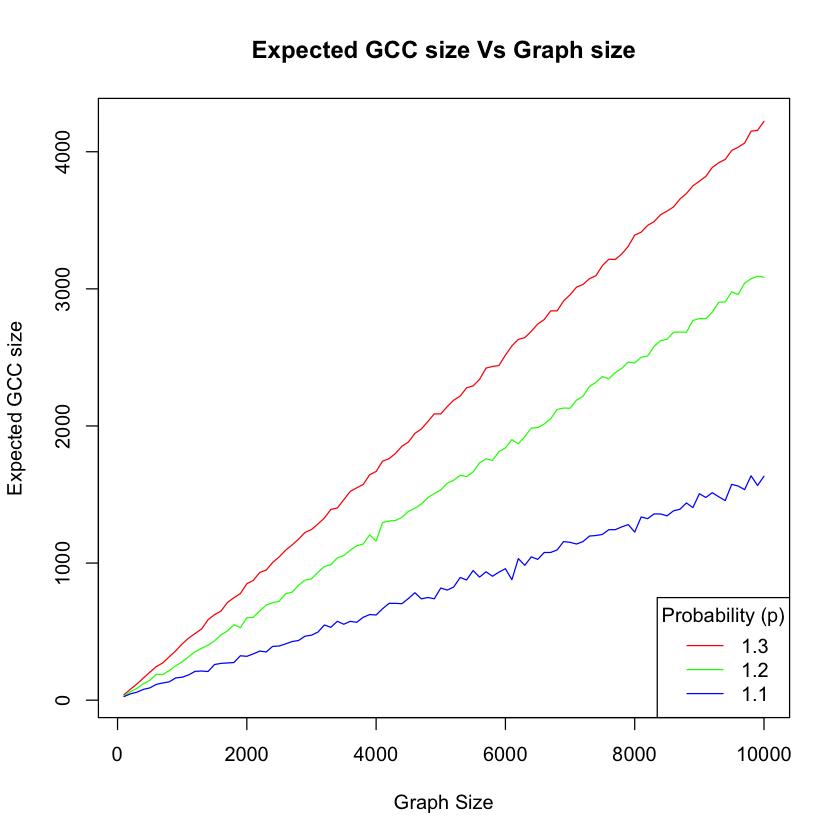

In [42]:
#lines(y = cl,x=nrange*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
plot(col='red',y = do_expected_gcc(1.3,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
legend("bottomright", legend=c('1.3','1.2','1.1'),col=c('red','green','blue'), lwd=1,title="Probability (p)")

lines(col='green',y = do_expected_gcc(1.2,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
lines(col= 'blue',y = do_expected_gcc(1.1,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')